## Calcium imaging of spontaneous activity in larval zebrafish tectum

Marcus Triplett, Lilach Avitan & Geoffrey Goodhill

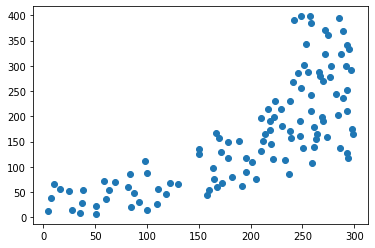

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  

dataset = 'zf_20151104-f1' 

coords_file = 'data/%s/%s_cell_coordinates.csv'%(dataset,dataset)

x = []
y = []

with open(coords_file) as f:
    for l in f.readlines():
        x.append(float(l.split(',')[0]))
        y.append(float(l.split(',')[1]))
        
#print x
#print y
        
plt.plot(x, y, lw=0, marker = 'o')

    
plt.show()


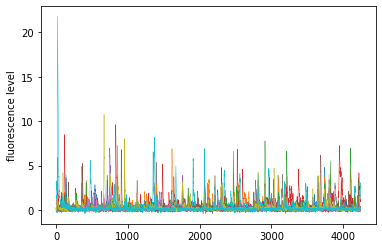

In [13]:
cell_data = {}

activity_file = 'data/%s/%s_activity_matrix.csv'%(dataset,dataset)


with open(activity_file) as f:
    cell_index = 1
    
    
    for l in f.readlines():
        entries = l.split(',')
        cell_data[cell_index] = []
        #print('Found %i entries for cell %i'%(len(entries),cell_index))
        for c in entries:
            cell_data[cell_index].append(float(c))
        cell_index+=1
        
NUM_CELLS_TO_PLOT=20
for i in range(NUM_CELLS_TO_PLOT):
    plt.plot(cell_data[i+1], lw=0.5) #superimposing graphs of NUM_CELLS_TO_PLOT rows of activity matrix
plt.ylabel("fluorescence level")
    
plt.show()
        

Examining assembly containing: [1, 6, 7, 8, 9, 11, 12, 13, 14, 17, 18, 19, 22, 23, 24, 26, 27, 28, 29, 32]


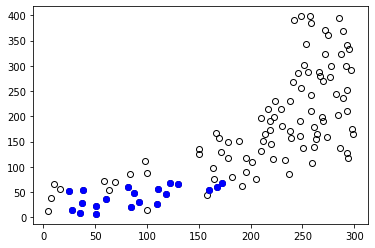

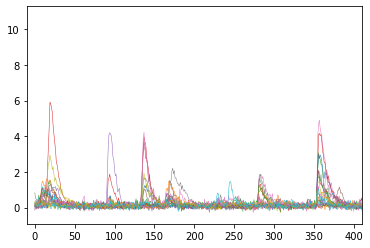

Examining assembly containing: [1, 5, 11, 15, 16, 17, 19, 21, 24, 25, 26, 27, 28, 31, 37, 44]


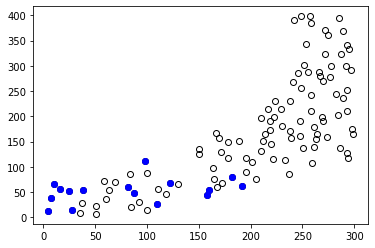

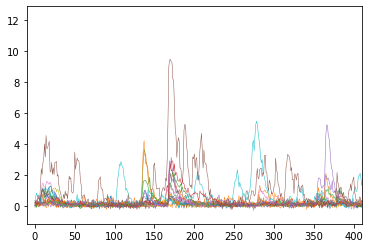

Examining assembly containing: [2, 3, 42, 43, 45, 49, 51, 52, 53, 54, 57, 58, 62, 64, 65, 66, 67, 68, 70, 71, 72, 74, 75, 76, 78, 79, 82, 83, 84, 89, 98]


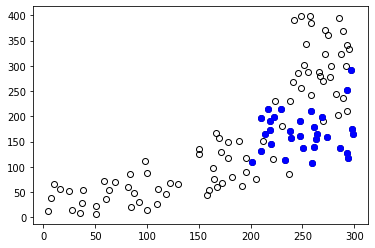

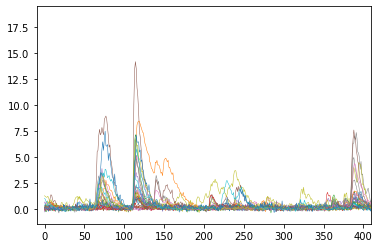

Examining assembly containing: [23, 27, 29, 32, 34, 36, 37, 38, 43, 45, 47, 55, 59]


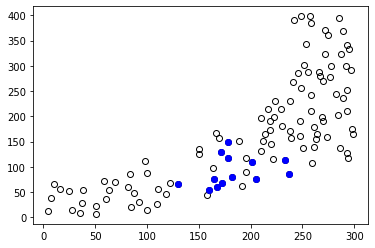

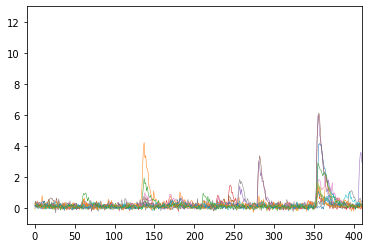

Examining assembly containing: [8, 94, 101, 102, 103, 104, 107, 108, 109, 110, 112, 113, 114]


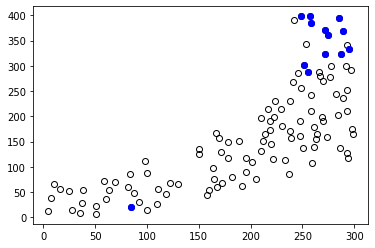

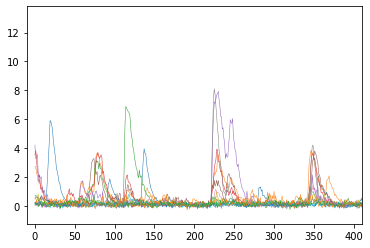

In [3]:

assembly_file = 'data/%s/%s_assembly_assignments.csv'%(dataset,dataset)


with open(assembly_file) as f:
    
    for l in f.readlines():
        
        cell_indices = [int(i) for i in l.split(',')]
        print('Examining assembly containing: %s'%cell_indices)
        
        
        plt.plot(x, y, lw=0, marker = 'o', fillstyle='none', color='k')
        for i in cell_indices:
            
            plt.plot([x[i-1]], [y[i-1]], lw=0, marker = 'o', color='b')
        plt.show()
        
        for i in cell_indices:
            plt.plot(cell_data[i], lw=0.5)

        plt.xlim([-10, 410 ])
        plt.show()
    

In [4]:
from datetime import datetime

from dateutil.tz import tzlocal
import pynwb
import math

start_time = datetime(2019, 1, 1, 11, tzinfo=tzlocal())
create_date = datetime.now(tz=tzlocal())

nwbfile = pynwb.NWBFile('Triplett et al. 2018', 
                  'TSD', 
                  start_time,
                  file_create_date=create_date,
                  notes='Calcium imaging file created with pynwb v%s'%pynwb.__version__,
                  experimenter='Marcus Triplett',
                  experiment_description='Calcium imaging of spontaneous activity in larval zebrafish tectum',
                  institution='University of Queensland')

for i in range(len(cell_data)):
    cell_id = i+1
    #print('Adding cell data %i'%cell_id)
    data = cell_data[cell_id]
    
    # TODO: Not correct units!!!
    timestamps = [t for t in range(len(data))]

    ts = pynwb.TimeSeries('Sweep_%i'%cell_id, data, 'SIunit', timestamps=timestamps)

    nwbfile.add_acquisition(ts)
    


nwb_file_name = 'TriplettEtAl2018.nwb'
io = pynwb.NWBHDF5IO(nwb_file_name, mode='w')
io.write(nwbfile)
io.close()
print("Written NWB file to %s"%nwb_file_name)

/media/kacha_nimbu/04365D13365D0758/gsoc/.gsoc/lib/python3.6/site-packages/hdmf/build/objectmapper.py:137: UserWarning: Value with data type int64 is being converted to data type float64 as specified.
  % (g.name, s.name))


Written NWB file to TriplettEtAl2018.nwb
